# Certificate in Data Science | Assignment 9 |  
- Naive Baye's Algorithm 

> University of Washington  
> October 2019  
> N. HICKS

## Project Guidance and Instructions

1. Leverage Naïve Bayes algorithm to build a  classification model using the data from previous milestones.  
<br>
2. Briefly summarize your findings on using Naïve Bayes.  
<br>
3. Is Naïve Bayes more accurate than the regression model you used in Milestone 3?

Note:  
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

## Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import qgrid
from sklearn import preprocessing
import statsmodels.formula.api as sm
import statsmodels.api as sm1
import statistics as stats

import sklearn.naive_bayes
import sklearn.metrics

## Functions for Scripting

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 7]   # set for all notebook; width, height of the resulting plots
sns.set()

In [3]:
# retrieve the prescribed dataset
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path+file, index_col=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED; REMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path,file), index_col=0)
    
    return _df



In [4]:
# establish a qGrid of the specified columns/features
# RETURN: qGrid object
def get_qGrid(df, features):
#     temp_df = pd.DataFrame(df[features[0]])
#     features.remove(features[0])
    temp_df = pd.DataFrame()
    for feature in features:
        temp_df = pd.concat([temp_df, df[feature]], axis=1)
    qGrid = qgrid.show_grid(temp_df)
    return qGrid



In [5]:
# Normalize a specified feature column
# RETURN: np.array
def get_normFeature(pdSeries):
    x_array = np.array(pdSeries)
    normalized_X = preprocessing.normalize([x_array])
    return normalized_X


# calculate the log of the specified feature 
# RETURN: pd.DataFrame
def logFeature(df, feature):
    vec = df[feature]
    if feature == 'sqft_basement':
        vec = vec.replace(0, 1)
    logList = np.log(vec)
    logName = feature + '_log'
    df.insert(loc=len(df.columns), column=logName, value=logList)
    return df



In [6]:
# plot a histogram of specified feature
# if specified feature exists as a 'log', plot it also
def hist_plot(df, name, bins):
    key_featureLabel = '_log'
    plt.figure()
    
    plt.subplot(1, 2, 1) # The first plot
    if name[len(name)-4:]!=key_featureLabel:
        vec = df[name]
        plt.hist(vec, bins = bins)
        plt.axvline(stats.mean(vec), color = 'red')

        plt.title(name)
        plt.ylabel('Frequency')
        plt.xlabel('Value')
        
        if (name + key_featureLabel) in df.columns:
            plt.subplot(1, 2, 2) # The second plot
            vec = df[name + key_featureLabel]
            plt.hist(vec, bins = bins)
            plt.axvline(stats.mean(vec), color = 'red')
    
            plt.title(name + key_featureLabel)
            plt.xlabel('Value')

    plt.show()


# establish a heatmap plot as a correlation matrix
def get_Heatmap(df):
    corr = housingNorm_df.corr()
    plt.figure(figsize=figArea)
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=75,
        horizontalalignment='right'
    )
    ax.set_title('Heatmap of Housing Feature Correlations\n', fontsize='14')
    

# establish a heatmap plot as a correlation matrix
def get_Heatmap(df):
    corr = df.corr()
    plt.figure()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=75,
        horizontalalignment='right'
    )
    ax.set_title('Heatmap of Housing Feature Correlations\n', fontsize='14')
    


In [7]:
# convert the specified feature via binning into logical categories
def categorize_feature(df, col):
    if col == 'price_log':
        num_bins = 2
        cat_labels = ['high cost', 'low cost']
    else:
        num_bins = 3
        cat_labels = ['below', 'average', 'above']

    featured = abode_df[col].values
    df[col] = pd.cut(featured, num_bins, labels=cat_labels)
    
    return df



In [8]:
# return the confusion matrix of the predicted values
def confusion_matrix2(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    


# evaluate the performance of the model predictions
def performance(results):
    accuracy = sklearn.metrics.accuracy_score(
        results['actual_cost'].cat.codes, results['predicted_cost'].cat.codes)
    precision = sklearn.metrics.precision_score(
        results['actual_cost'].cat.codes, results['predicted_cost'].cat.codes)
    recall = sklearn.metrics.recall_score(
        results['actual_cost'].cat.codes, results['predicted_cost'].cat.codes)

    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    
    return confusion_matrix2(results['actual_cost'],
                            results['predicted_cost'],
                            results.actual_cost.cat.categories)



## Import the Data

In [9]:
path = 'https://library.startlearninglabs.uw.edu//DATASCI410//Datasets//'
file = 'kc_house_data.csv'
abode_df = fetch_data(path, file)
abode_df.head()

LOCAL FILE USED; REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)




,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Create Additional Features

In [10]:
log_features = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
               ]
for elem in log_features:
    abode_df = logFeature(abode_df, elem)

## Convert and Evaluate the DataFrame

In [11]:
abode_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,8.639411,7.073270,0.000000
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,13.195614,7.851661,8.887653,7.682482,5.991465
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,9.210340,6.646391,0.000000
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,8.517193,6.956545,6.813445
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,8.997147,7.426549,0.000000


In [12]:
abode_df['date'] = pd.to_datetime(abode_df['date'])

In [13]:
print(abode_df.isna().sum())

date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price_log            0
sqft_living_log      0
sqft_lot_log         0
sqft_above_log       0
sqft_basement_log    0
dtype: int64


In [14]:
# provide information of the dataset features
abode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 25 columns):
date                 21613 non-null datetime64[ns]
price                21613 non-null float64
bedrooms             21613 non-null int64
bathrooms            21613 non-null float64
sqft_living          21613 non-null int64
sqft_lot             21613 non-null int64
floors               21613 non-null float64
waterfront           21613 non-null int64
view                 21613 non-null int64
condition            21613 non-null int64
grade                21613 non-null int64
sqft_above           21613 non-null int64
sqft_basement        21613 non-null int64
yr_built             21613 non-null int64
yr_renovated         21613 non-null int64
zipcode              21613 non-null int64
lat                  21613 non-null float64
long                 21613 non-null float64
sqft_living15        21613 non-null int64
sqft_lot15           21613 non-null int64
price_log         

In [15]:
abode_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,13.047817,7.550335,8.989956,7.394877,2.528485
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,53.505026,0.138564,0.140828,685.391304,27304.179631,0.526685,0.424807,0.902425,0.427631,3.169773
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,11.225243,5.669881,6.253829,5.669881,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,12.682152,7.263330,8.525161,7.081709,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,13.017003,7.554859,8.938269,7.352441,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,13.377006,7.843849,9.276877,7.700748,6.327937
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,15.856731,9.513404,14.317109,9.149528,8.480529


### Remove Specified Outliers

In [16]:
# filter the outlier data from 'bedrooms'
print('Original Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))
is_notOut = abode_df['bedrooms']<=11
abode_df = abode_df[is_notOut]
abode_df.reset_index()
print('Filtered Feature: {}'.format(sorted(abode_df['bedrooms'].unique())))

Original Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Filtered Feature: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [17]:
colNames = abode_df.columns
abode_qGrid = get_qGrid(abode_df, colNames)
abode_qGrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Visualize the Dataset  
> - In order to apply the Naive Baye's algorithm, validate if the features of interest are Gaussian. Remove them otherwise.  
<br>  
> - Then, remove correlated features to ensure Naive Baye's employs only independent features.

#### Histogram Plots of Features

In [18]:
abode_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,...,98077.938645,47.560047,-122.213891,1986.582871,12768.828984,13.047802,7.550342,8.989970,7.394898,2.528308
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,...,53.505993,0.138564,0.140829,685.392610,27304.756179,0.526692,0.424815,0.902444,0.427630,3.169739
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,11.225243,5.669881,6.253829,5.669881,0.000000
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,98033.000000,47.470975,-122.328000,1490.000000,5100.000000,12.681802,7.262979,8.525161,7.081709,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,13.017003,7.554859,8.938400,7.352441,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,13.377006,7.843849,9.276900,7.700748,6.327937
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,15.856731,9.513404,14.317109,9.149528,8.480529


SELECTED FEATURES
['bathrooms' 'bedrooms' 'condition' 'floors' 'grade' 'price' 'sqft_above'
 'sqft_basement' 'sqft_living' 'sqft_lot']



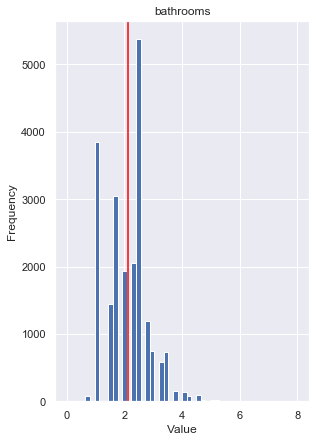

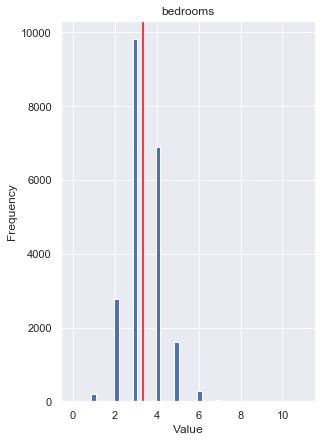

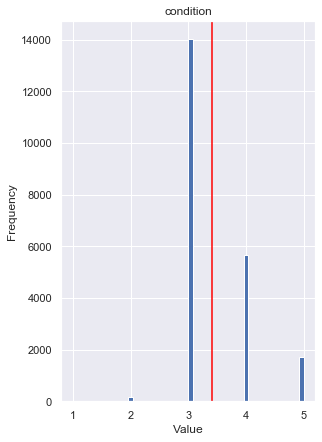

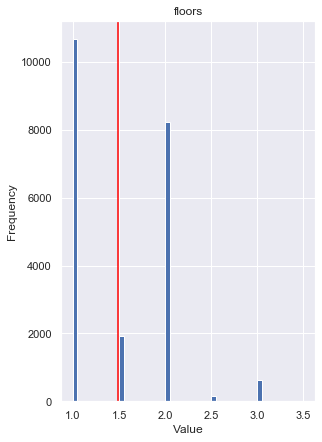

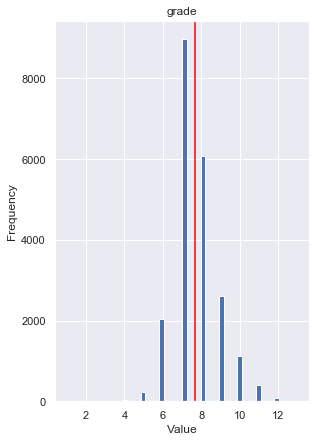

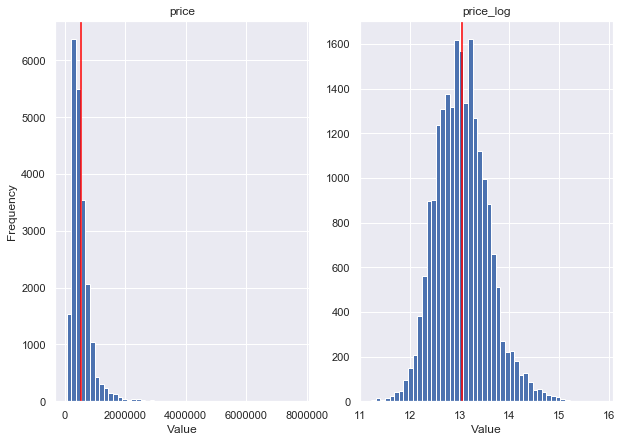

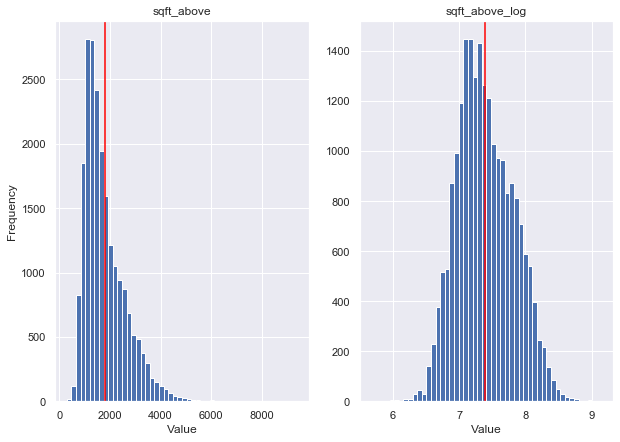

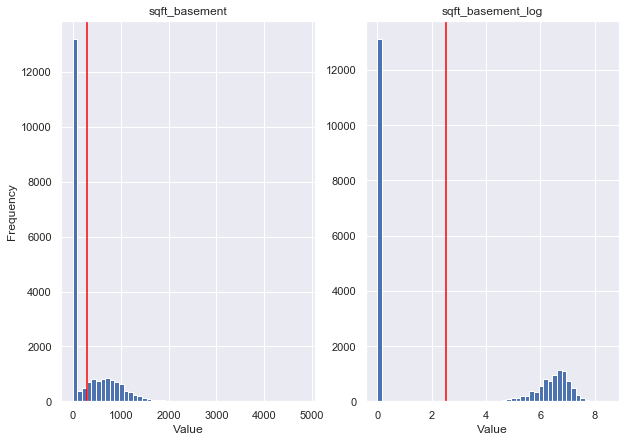

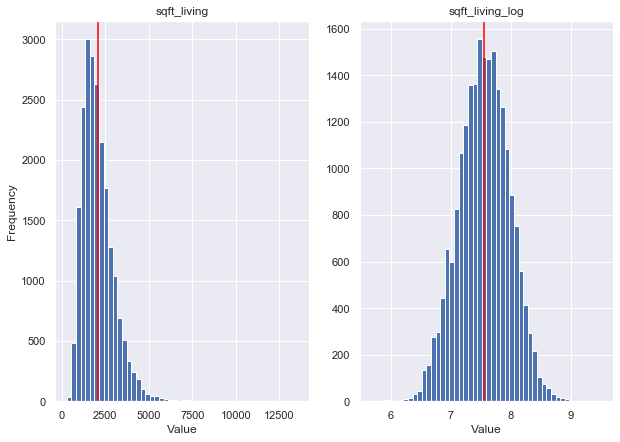

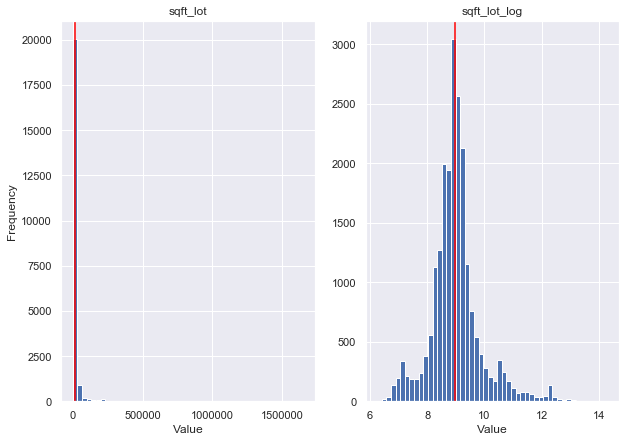

In [19]:
# visualize the dataset features
# inspect for Gaussian distributions
bins = 50
features = abode_df.columns.values

# blacklist the features of least significance to the problem statement (seeking relationship of price to features)
blacklist = ['date', 'id', 'lat', 'long', 'view',
             'price_log', 'sqft_living_log', 'sqft_lot_log', 'sqft_above_log', 'sqft_basement_log',
             'sqft_living15', 'sqft_lot15', 'yr_renovated']

# remove the non-Gaussian features that are unchanged after applying a log calculation
non_gaussian = ['zipcode', 'waterfront', 'yr_built']
blacklist = blacklist + non_gaussian

for elem in blacklist:
    features = features[features != elem]
    features = np.sort(features)
    
print('SELECTED FEATURES\n{}\n'.format(str(features)))

for elem in features:
    hist_plot(abode_df, elem, bins)

#### Correlations of Features

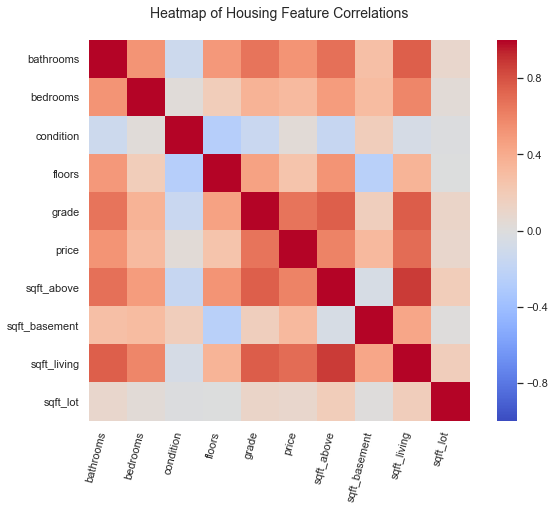

In [20]:
# show a correelation heatmap of the selected features
get_Heatmap(pd.DataFrame(abode_df[features]))

> - Note that, in general, a correlation is not sufficient to infer a causal relationship (i.e. the indepenedence of features can not be confirmed in this way).  

## Establish an Naive Baye's Model

In [21]:
list_a = features[0:5]
feature_logs = np.array(['price_log', 'sqft_living_log', 'sqft_lot_log', 'sqft_above_log', 'sqft_basement_log'])
features_updated = np.concatenate([list_a, feature_logs])

### Establish Categorical Features

In [22]:
# establish the categorized features from numerical values
for label in features_updated:
    abode_df = categorize_feature(abode_df, label)
    print(label)

bathrooms
bedrooms
condition
floors
grade
price_log
sqft_living_log
sqft_lot_log
sqft_above_log
sqft_basement_log


In [23]:
# cleanup the dataset with only the utilized features remaining
for item in abode_df.columns:
    if abode_df[item].dtype.name != 'category':
        abode_df.drop([item], axis=1, inplace = True)

In [24]:
abode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
bedrooms             21612 non-null category
bathrooms            21612 non-null category
floors               21612 non-null category
condition            21612 non-null category
grade                21612 non-null category
price_log            21612 non-null category
sqft_living_log      21612 non-null category
sqft_lot_log         21612 non-null category
sqft_above_log       21612 non-null category
sqft_basement_log    21612 non-null category
dtypes: category(10)
memory usage: 380.9 KB


### Encode Features from Categories

In [25]:
# encode the feature categories to numeric feature vectors
label_col = 'price_log'
feature_vecs = np.array([abode_df[c].cat.codes
                         for c in abode_df.columns
                         if c != label_col]).T
print(abode_df.columns)
print(feature_vecs.shape)

Index(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_above_log',
       'sqft_basement_log'],
      dtype='object')
(21612, 9)


In [26]:
# convert the label ('low cost' vs. 'high cost') to numeric values
labels = abode_df[label_col].cat.codes
# evaluate the mapping results for the first 25 values
list(zip(abode_df[label_col][:25], labels[:25]))

[('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('low cost', 1),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0),
 ('low cost', 1),
 ('high cost', 0),
 ('high cost', 0),
 ('high cost', 0)]

### Establish the Model using Laplace Smoothing

In [27]:
# Define the Naive Baye's model
# apply Laplace Smoothing to ensure non-zero results
model = sklearn.naive_bayes.MultinomialNB(alpha=3)

# Train the model with the housing dataset
model.fit(feature_vecs, labels)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

### Establish Predictions

In [28]:
num_eval = 3500   # the number of records to evaluate
# establish initial prediction results
predicted_value = model.predict(feature_vecs[:num_eval])
value_probabilities = model.predict_proba(feature_vecs[:num_eval])

results = pd.DataFrame({
    'actual_cost': abode_df['price_log'][:num_eval],
    'predicted_cost': pd.Categorical.from_codes(
        predicted_value, abode_df['price_log'][:num_eval].cat.categories),
    'proba(below_avg)': value_probabilities[:, 1],
    'proba(above_avg)': value_probabilities[:, 0]
    })
results

,actual_cost,predicted_cost,proba(below_avg),proba(above_avg)
id,,,,
7129300520,high cost,high cost,0.112915,0.887085
6414100192,high cost,high cost,0.138120,0.861880
5631500400,high cost,high cost,0.107254,0.892746
2487200875,high cost,high cost,0.301193,0.698807
1954400510,high cost,high cost,0.105643,0.894357
7237550310,low cost,high cost,0.350466,0.649534
1321400060,high cost,high cost,0.133208,0.866792
2008000270,high cost,high cost,0.105643,0.894357
2414600126,high cost,high cost,0.117180,0.882820


In [29]:
performance(results)

Accuracy = 0.838, Precision = 0.800, Recall = 0.007


,high cost,low cost
high cost,2930,1
low cost,565,4


## Conclusion

> 1. This assignment was to accomplish a Naive Baye's model to predict house purchase prices.  
<br>
> 2. This goal was successfully accomplished as demonstrated from the confusion matrix results above, as well as the preceding table of actual and predicted outputs and probablities above that.  
<br>
> 3. Some particular effort was expended toward aligning the predicted values with the confusion matrix for interpretation.  After the correct alignment of variables used to execute the category encoding was established, these final results (as shown) were made clear.  
<br>  
> 4. Learning about Sci-Kit Learn to apply Categorical features and associated encoding upon the dataset features was an entirely new aspect that will clearly be important in my future applications of Python code development.  
<br>  
> 5. The Naive Baye's model appears here to perform less well than expected, in that, the model is challenged to predict 'low cost' housing prices given the provided features.  
<br>  
> 6. The model is established first by deriving additional features of log values, thus improving predictions as the resultant distributions are more so Gaussian.  
<br>  
> 7. The Accuracy (a measure of correctness) of the model is relatively high, while Precision (a measure of consistency) is nearly of the same magnitude, and its Recall (a measure of how many true positives were identified) is quite low at approximatley 0.

> - This Naive Baye's model performance strongly suggests that its predictive power is low. This is likely due to inter-feature dependencies that occur most commonly in real world datasets, of which this model blindly relies for its performance.  
<br>
> - Despite the intent to remove existing feature dependencies they still exist. Thus, the prior Milestone 3 assignment is expected to perform more accurately than the Naive Baye's model due to regularization that reduces overfitting providing a more generalized model.